# Project 3 - Unsupervised  learning:

Employee Performance Analysis : Employee Performance Analysis: 

        Analyze employee performance data to identify performance patterns or clusters. Procedure: Apply K-means on employee performance metrics, such as productivity, attendance, feedback scores, or goal achievements. Domain: Human Resources

In [20]:
import numpy as np
import pandas as pd
data2 = pd.read_csv('Train.csv')
data2

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,EID_16328,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,...,type3,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839
6996,EID_8387,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,...,type3,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055
6997,EID_8077,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,...,type2,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847
6998,EID_19597,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,...,type0,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162


In [21]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [22]:
data2.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [23]:
data2.tail()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
6995,EID_16328,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,...,type3,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839
6996,EID_8387,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,...,type3,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055
6997,EID_8077,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,...,type2,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847
6998,EID_19597,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,...,type0,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162
6999,EID_1640,F,58.0,3,Married,Franklin,IT,Directive,22.0,2,...,type2,3.0,3,-0.1048,-1.6150,3.0,4,5,3,0.0910


In [24]:
data2.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


In [25]:
data2.dtypes

Employee_ID                   object
Gender                        object
Age                          float64
Education_Level                int64
Relationship_Status           object
Hometown                      object
Unit                          object
Decision_skill_possess        object
Time_of_service              float64
Time_since_promotion           int64
growth_rate                    int64
Travel_Rate                    int64
Post_Level                     int64
Pay_Scale                    float64
Compensation_and_Benefits     object
Work_Life_balance            float64
VAR1                           int64
VAR2                         float64
VAR3                         float64
VAR4                         float64
VAR5                           int64
VAR6                           int64
VAR7                           int64
Attrition_rate               float64
dtype: object

In [26]:
data2.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [27]:
data2.dropna(inplace = True)

In [28]:
data2

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
5,EID_2278,M,54.0,3,Married,Lebanon,Purchasing,Conceptual,19.0,1,...,type2,1.0,3,-1.8176,1.8688,2.0,2,8,3,0.7613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,EID_16328,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,...,type3,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839
6996,EID_8387,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,...,type3,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055
6997,EID_8077,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,...,type2,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847
6998,EID_19597,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,...,type0,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162


In [29]:
data2.isna().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
Attrition_rate               0
dtype: int64

In [36]:
x = data2.drop("Employee_ID",axis='columns')
x

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
4,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
5,M,54.0,3,Married,Lebanon,Purchasing,Conceptual,19.0,1,21,...,type2,1.0,3,-1.8176,1.8688,2.0,2,8,3,0.7613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,20,...,type3,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839
6996,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,59,...,type3,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055
6997,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,59,...,type2,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847
6998,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,21,...,type0,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162


In [37]:
data2

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
5,EID_2278,M,54.0,3,Married,Lebanon,Purchasing,Conceptual,19.0,1,...,type2,1.0,3,-1.8176,1.8688,2.0,2,8,3,0.7613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,EID_16328,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,...,type3,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839
6996,EID_8387,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,...,type3,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055
6997,EID_8077,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,...,type2,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847
6998,EID_19597,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,...,type0,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162


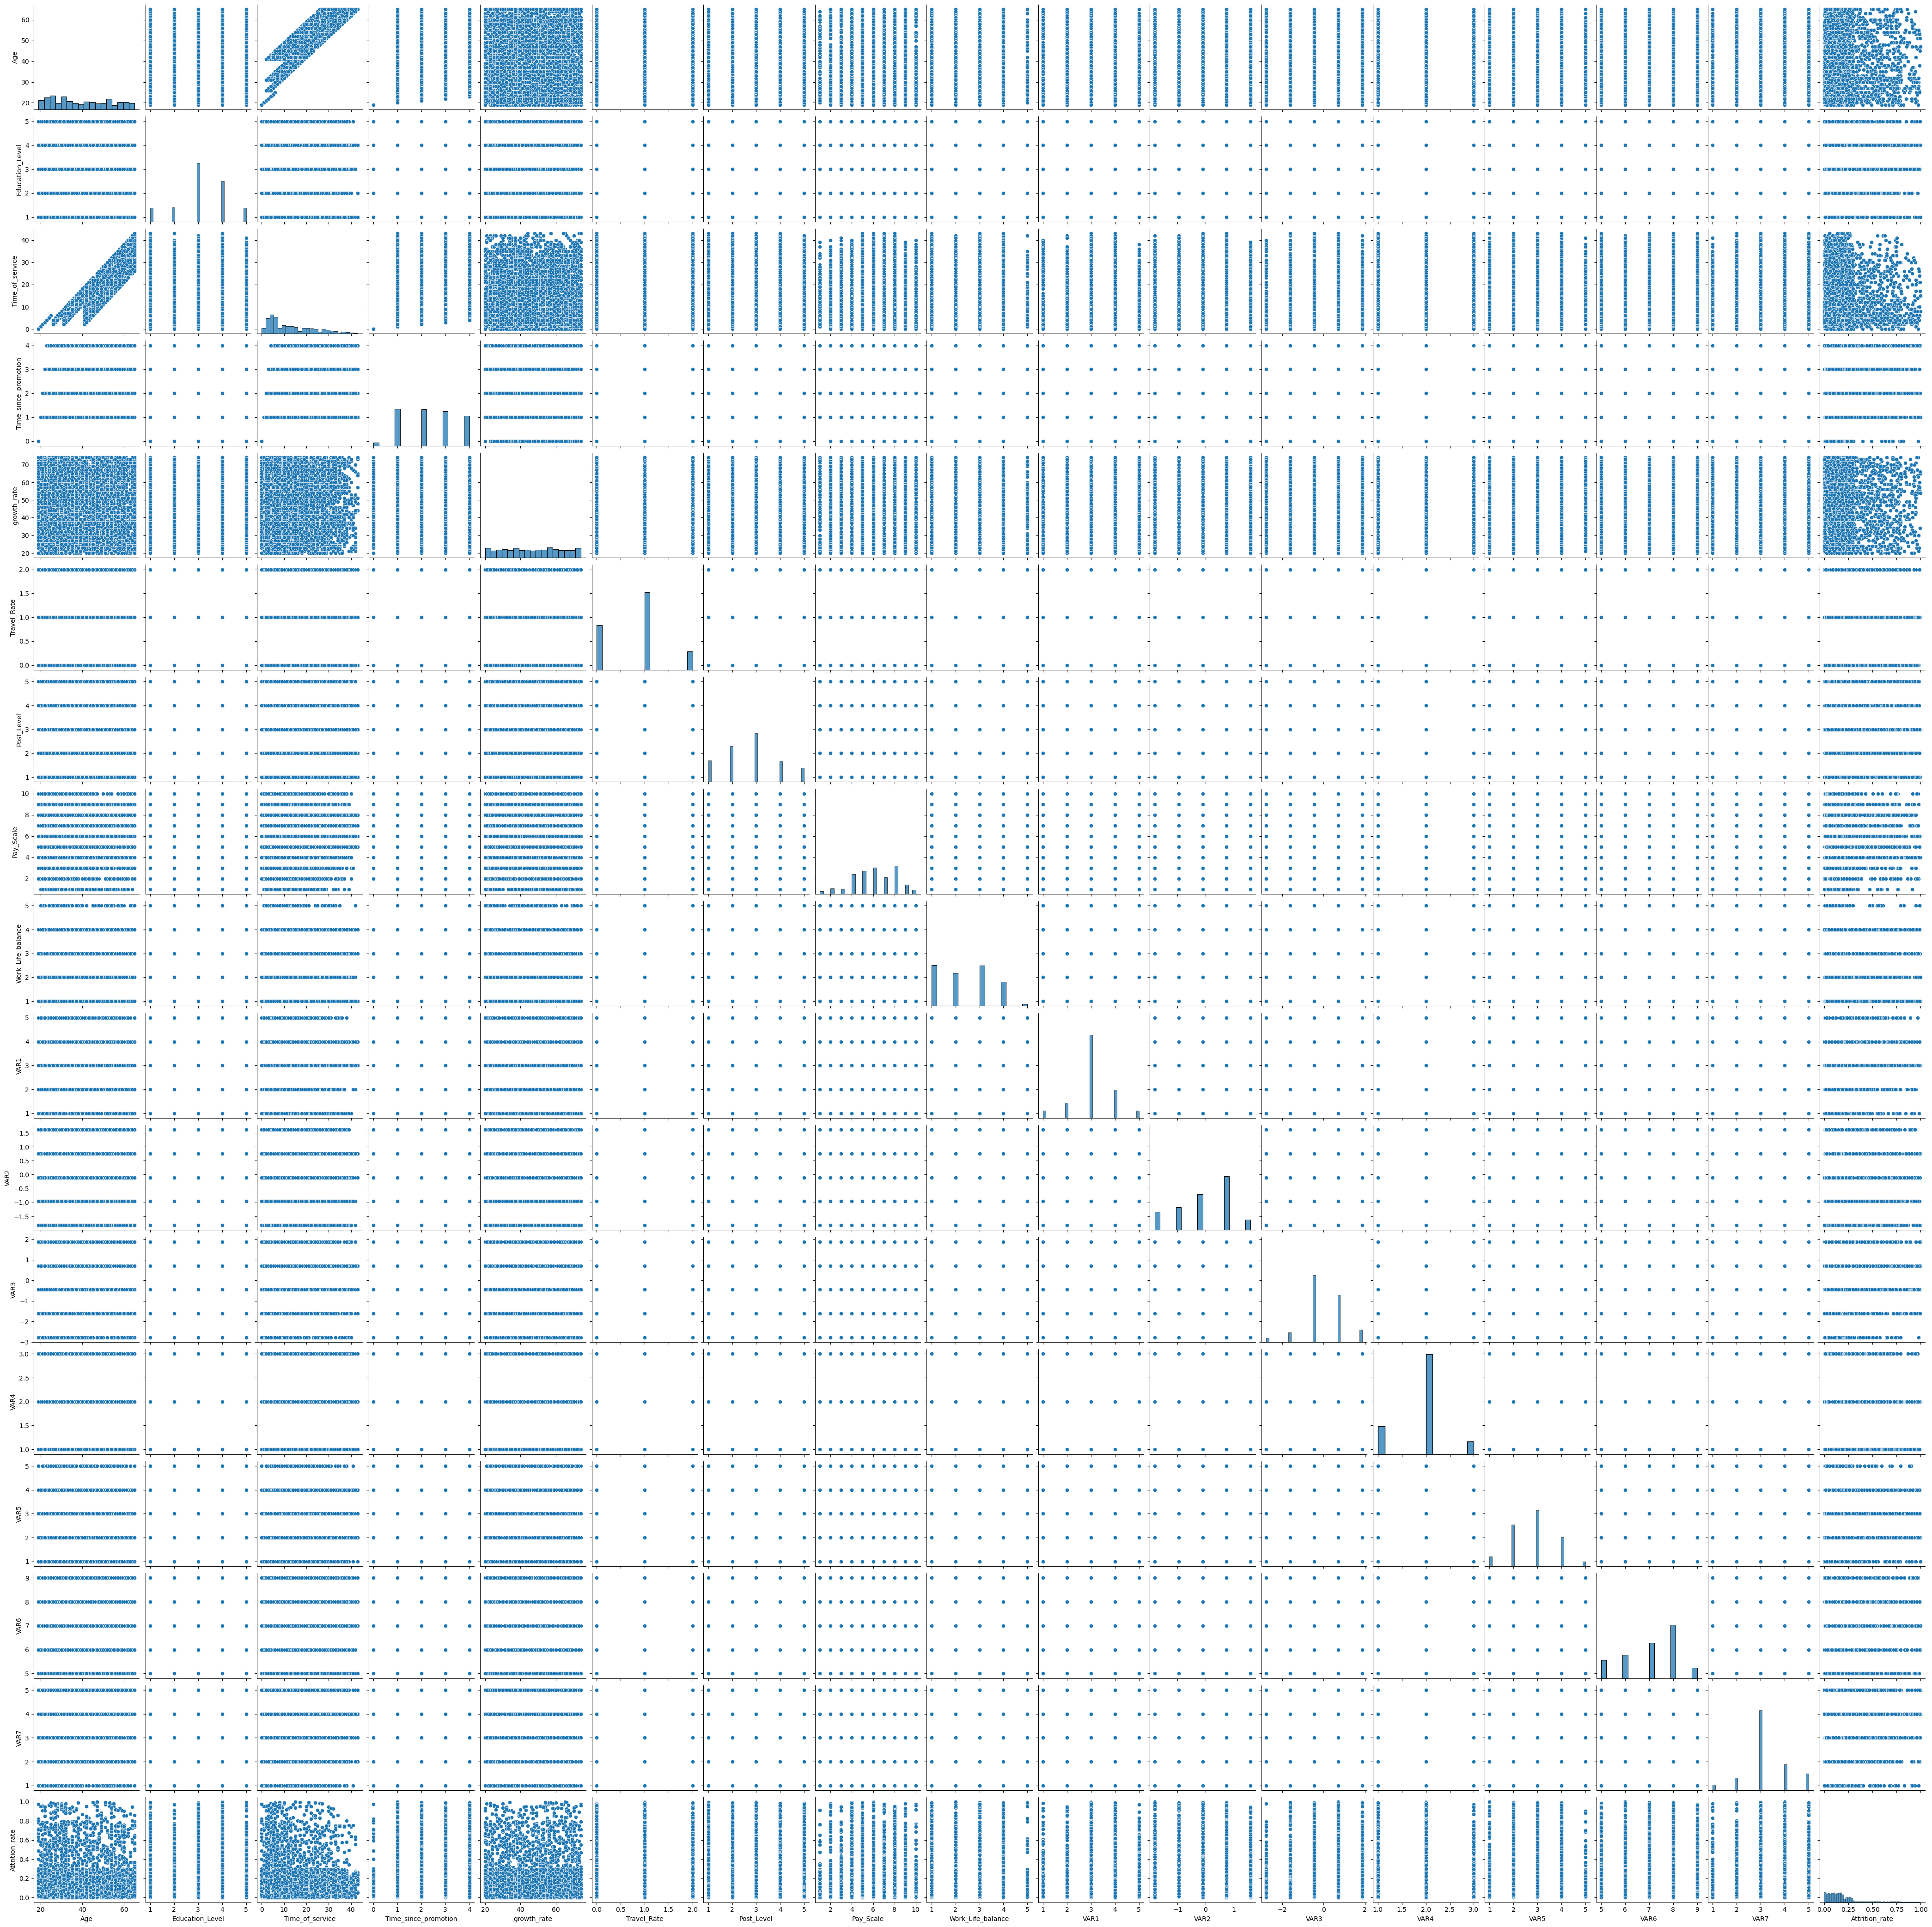

In [31]:
import seaborn as sns
sns.pairplot(data2)

In [39]:
#### Import label encoder
from sklearn.preprocessing import LabelEncoder
  
le = LabelEncoder()
data2.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [42]:
data2['Gender'] = le.fit_transform(data2['Gender'])
data2['Relationship_Status'] = le.fit_transform(data2['Relationship_Status'])
data2['Hometown'] = le.fit_transform(data2['Hometown'])
data2['Employee_ID'] = le.fit_transform(data2['Employee_ID'])
data2['Unit'] = le.fit_transform(data2['Unit'])
data2['Decision_skill_possess'] = le.fit_transform(data2['Decision_skill_possess'])
data2['Compensation_and_Benefits'] = le.fit_transform(data2['Compensation_and_Benefits'])


In [43]:
data2

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,3137,0,42.0,4,0,1,2,2,4.0,4,...,2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,1877,1,24.0,3,1,3,3,0,5.0,4,...,2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,4062,0,58.0,3,0,0,8,2,27.0,3,...,2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
4,2937,0,31.0,1,0,3,3,2,5.0,4,...,3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
5,3002,1,54.0,3,0,2,7,2,19.0,1,...,2,1.0,3,-1.8176,1.8688,2.0,2,8,3,0.7613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,1502,0,23.0,5,0,1,5,1,4.0,1,...,3,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839
6996,5026,0,44.0,1,0,2,9,0,16.0,2,...,3,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055
6997,4952,0,49.0,3,1,3,2,3,10.0,1,...,2,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847
6998,2273,0,47.0,3,0,4,10,1,24.0,1,...,0,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162


In [34]:
from sklearn.cluster import KMeans

In [44]:
cluster = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, random_state = 678)
  kmeans.fit(data2)
  cluster.append((i, kmeans.inertia_))

In [45]:
cluster

[(1, 12785401329.61976),
 (2, 3198301418.652826),
 (3, 1422889206.6272168),
 (4, 801507238.0148523),
 (5, 513898327.56296366),
 (6, 357678796.4127675),
 (7, 263356116.05584753),
 (8, 202276213.83294332),
 (9, 160346535.89335412),
 (10, 130307470.84125079)]

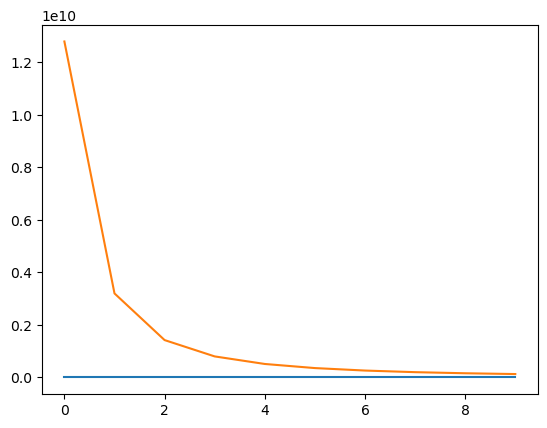

In [46]:
plt.plot(cluster)

In [48]:
kmeans = KMeans(n_clusters = 5, random_state = 45)

kmeans.fit(data2)

KMeans(n_clusters=5, random_state=45)

In [50]:
kmeans.predict([data2.iloc[5, :]])

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([3])

In [52]:
data2.iloc[5, :]

Employee_ID                  2026.0000
Gender                          0.0000
Age                            21.0000
Education_Level                 4.0000
Relationship_Status             0.0000
Hometown                        3.0000
Unit                            7.0000
Decision_skill_possess          3.0000
Time_of_service                 2.0000
Time_since_promotion            1.0000
growth_rate                    50.0000
Travel_Rate                     1.0000
Post_Level                      1.0000
Pay_Scale                       6.0000
Compensation_and_Benefits       2.0000
Work_Life_balance               2.0000
VAR1                            3.0000
VAR2                           -0.9612
VAR3                            0.7075
VAR4                            2.0000
VAR5                            3.0000
VAR6                            7.0000
VAR7                            3.0000
Attrition_rate                  0.2819
Name: 6, dtype: float64

In [53]:
labels = kmeans.labels_

In [54]:
labels

array([4, 3, 2, ..., 1, 4, 3])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


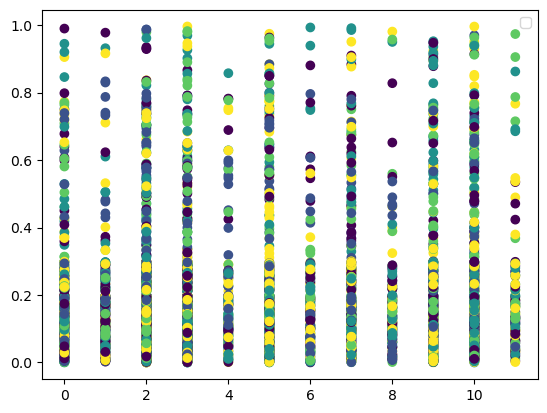

In [59]:
plt.scatter(data2["Unit"],data2["Attrition_rate"],c = labels)
plt.legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


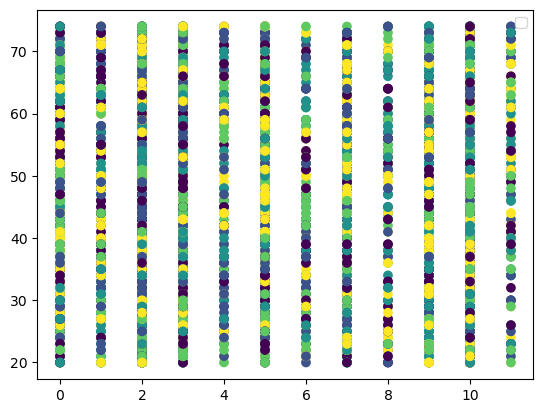

In [57]:
plt.scatter(data2["Unit"],data2["growth_rate"], c = labels)
plt.legend()


In [60]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [62]:
lin = linkage(data2[["Unit","growth_rate"]][:10])

In [63]:
lin

array([[ 0.        ,  6.        ,  1.        ,  2.        ],
       [ 5.        ,  7.        ,  1.        ,  2.        ],
       [ 2.        , 11.        ,  1.41421356,  3.        ],
       [ 1.        , 10.        ,  2.23606798,  3.        ],
       [ 4.        ,  8.        ,  4.47213595,  2.        ],
       [ 9.        , 14.        ,  6.40312424,  3.        ],
       [13.        , 15.        ,  8.54400375,  6.        ],
       [ 3.        , 12.        , 12.08304597,  4.        ],
       [16.        , 17.        , 13.60147051, 10.        ]])

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [12.5, 12.5, 42.5, 42.5],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [27.5, 27.5, 73.75, 73.75]],
 'dcoord': [[0.0, 1.0, 1.0, 0.0],
  [0.0, 2.23606797749979, 2.23606797749979, 1.0],
  [0.0, 4.47213595499958, 4.47213595499958, 0.0],
  [0.0, 6.4031242374328485, 6.4031242374328485, 4.47213595499958],
  [2.23606797749979, 8.54400374531753, 8.54400374531753, 6.4031242374328485],
  [0.0, 1.0, 1.0, 0.0],
  [0.0, 1.4142135623730951, 1.4142135623730951, 1.0],
  [0.0, 12.083045973594572, 12.083045973594572, 1.4142135623730951],
  [8.54400374531753,
   13.601470508735444,
   13.601470508735444,
   12.083045973594572]],
 'ivl': ['1', '0', '6', '9', '4', '8', '3', '2', '5', '7'],
 'leaves': [1, 0, 6, 9, 4, 8, 3, 2, 5, 7],
 'color_list': ['C1', 'C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C0', 'C0'],
 'leaves_color_list': ['C1',
  'C1',
  'C1',


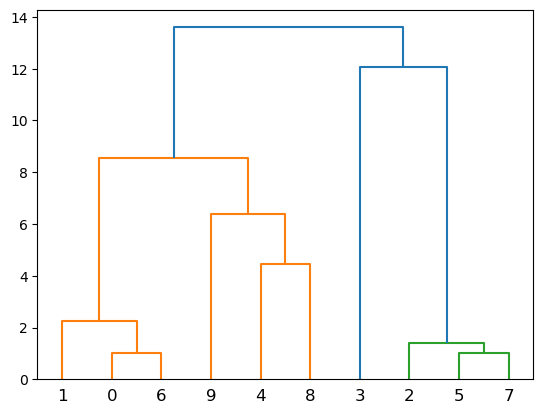

In [64]:
dendrogram(lin)

In [65]:
from sklearn.cluster import AgglomerativeClustering

In [66]:
clus = AgglomerativeClustering(n_clusters = 5)

In [67]:
c  = clus.fit_predict(data2)

In [68]:
c

array([2, 3, 0, ..., 0, 3, 3], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


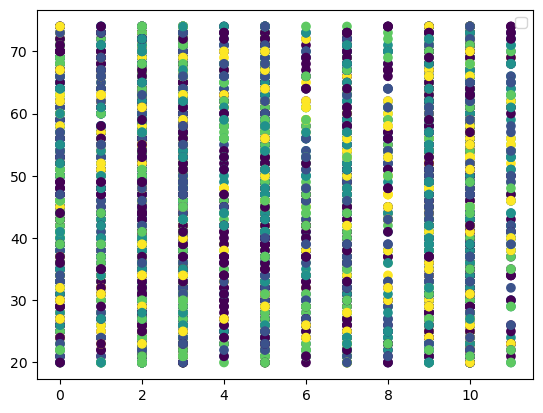

In [70]:
plt.scatter(data2["Unit"],data2["growth_rate"], c = c)
plt.legend()